In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Introduction to Brownian motions in Python

## Explanations

The code that follows is inspired by the Wikipedia article on [geometric Brownian motions](https://en.wikipedia.org/wiki/Geometric_Brownian_motion).

It relies on the idea that we can express $x_{t}$ defined by the initial differential equation under an exponential form.  

$$x_t = x_0 \exp[(\mu - \frac{\sigma^2}{2})t + \sigma W_t]$$ 

And we can approximate this continuous-time expression by a discrete-time one with small time steps $dt$.

$$x_t = x_0 \exp(\sum\limits_{dt\,in\,[0, t]}[(\mu - \frac{\sigma^2}{2})dt + \sigma W_{dt}])$$ 

$$\iff x_t = x_0 \prod\limits_{dt\,in\,[0, t]} \exp[(\mu - \frac{\sigma^2}{2})dt + \sigma W_{dt}]$$

So we are going to simulate several values of what is inside the product sign, knowing that from the definition of a Wiener process:

$$W_{dt} \sim \mathcal{N}(0, dt) $$

And then, we will cumulatively multiply them to each other (starting from 1) and finally multiply the resulting array by $x_{0}$.

## GBM Generative Function

In [2]:
def generate_GBM(mu, sigma, n=50, dt=0.1, x0=10):
    
    normal_component = np.random.normal(0, np.sqrt(dt), size=n)
    
    x = np.exp((mu - sigma ** 2 / 2) * dt + sigma * normal_component)
    
    x = np.concatenate([np.ones(1), x])
    x = x0 * x.cumprod()
    
    return x

## Plots

In [13]:
def show_plots():
    fig = plt.figure(figsize=(15, 13))
    grid = plt.GridSpec(3, 2, wspace=0.4, hspace=0.2)

    for i in range(2):
        for j in range(2):
            plt.subplot(grid[i, j])
    plt.subplot(grid[2, :])

    mus = [0.5, 0.5, 1, 1]
    sigmas = [0.2, 0.8, 0.2, 0.8]

    for mu, sigma, ax in zip(mus, sigmas, fig.get_axes()):
        ax.plot(generate_GBM(mu=mu, sigma=sigma))
        ax.set_title(f"Geometric Brownian Motion - mu={mu} and sigma={sigma}")

    last_ax = fig.get_axes()[-1]
    last_ax.plot(generate_GBM(mu=1, sigma=0.3), label="Good Technology - mu=1 and sigma=0.3")
    last_ax.plot(generate_GBM(mu=0.75, sigma=0.5), label="Bad Technology - mu=0.75 and sigma=0.5")
    last_ax.legend()
    
    plt.show()

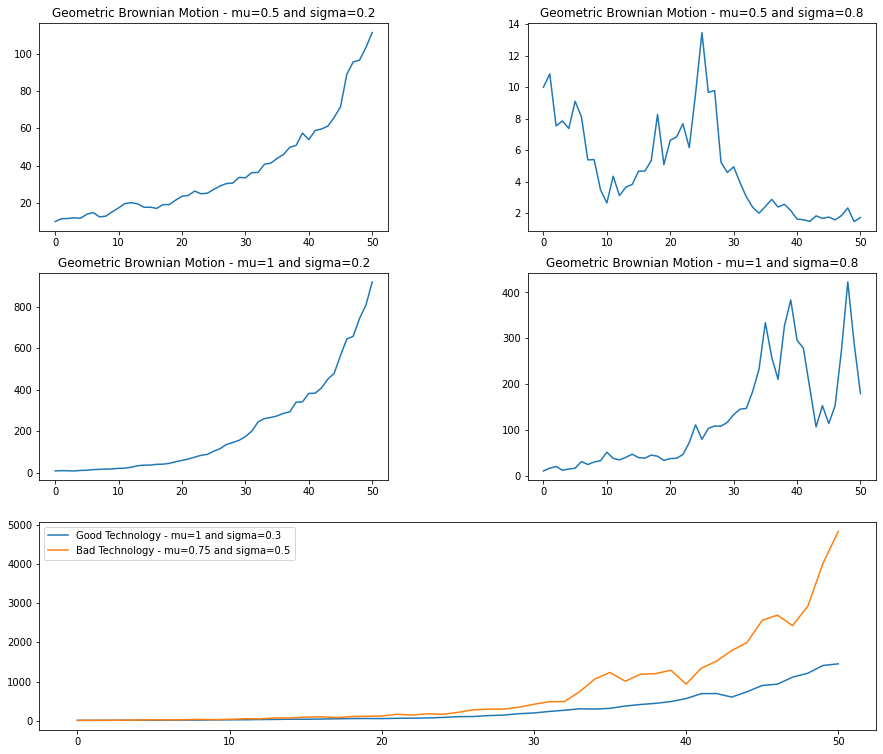

In [14]:
show_plots()